In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns 
import matplotlib.pyplot as plt



In [30]:
df = pd.read_csv(r"C:\Users\Fjwu\Downloads\archive\tested.csv")

In [31]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [34]:
df.shape

(418, 12)

In [35]:
#data pre prossesing 
# Handle missing values
df.dropna(subset=['Survived'], inplace=True)
df ['Age'].fillna(df ['Age'].median(), inplace=True)
df ['Embarked'].fillna(df ['Embarked'].mode()[0], inplace=True)

# Feature selection
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df [features]
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)
y = df ['Survived']


In [36]:
#Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['missing#'] = df.isna().sum().values
    sum['missing%'] = (df.isna().sum().values*100)/len(df)
    sum['uniques'] = df.nunique().values
    sum['count'] = df.count().values
    #sum['skew'] = df.skew().values
    desc = pd.DataFrame(df.describe().T)
    sum['min'] = desc['min']
    sum['max'] = desc['max']
    sum['mean'] = desc['mean']
    return sum

summary(df).style.background_gradient(cmap='twilight_shifted_r')

,dtypes,missing#,missing%,uniques,count,min,max,mean
PassengerId,int64,0,0.000000,418,418,892.000000,1309.000000,1100.500000
Survived,int64,0,0.000000,2,418,0.000000,1.000000,0.363636
Pclass,int64,0,0.000000,3,418,1.000000,3.000000,2.265550
Name,object,0,0.000000,418,418,nan,nan,nan
Sex,object,0,0.000000,2,418,nan,nan,nan
Age,float64,0,0.000000,79,418,0.170000,76.000000,29.599282
SibSp,int64,0,0.000000,7,418,0.000000,8.000000,0.447368
Parch,int64,0,0.000000,8,418,0.000000,9.000000,0.392344
Ticket,object,0,0.000000,363,418,nan,nan,nan
Fare,float64,1,0.239234,169,417,0.000000,512.329200,35.627188


In [38]:
df.drop(columns=['Cabin'], inplace=True)


In [39]:
summary(df).style.background_gradient(cmap='twilight_shifted_r')

,dtypes,missing#,missing%,uniques,count,min,max,mean
PassengerId,int64,0,0.000000,418,418,892.000000,1309.000000,1100.500000
Survived,int64,0,0.000000,2,418,0.000000,1.000000,0.363636
Pclass,int64,0,0.000000,3,418,1.000000,3.000000,2.265550
Name,object,0,0.000000,418,418,nan,nan,nan
Sex,object,0,0.000000,2,418,nan,nan,nan
Age,float64,0,0.000000,79,418,0.170000,76.000000,29.599282
SibSp,int64,0,0.000000,7,418,0.000000,8.000000,0.447368
Parch,int64,0,0.000000,8,418,0.000000,9.000000,0.392344
Ticket,object,0,0.000000,363,418,nan,nan,nan
Fare,float64,1,0.239234,169,417,0.000000,512.329200,35.627188


In [40]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [41]:
df['Fare'].fillna(df['Fare'].mean(), inplace=True)


In [42]:
summary(df).style.background_gradient(cmap='twilight_shifted_r')

,dtypes,missing#,missing%,uniques,count,min,max,mean
PassengerId,int64,0,0.000000,418,418,892.000000,1309.000000,1100.500000
Survived,int64,0,0.000000,2,418,0.000000,1.000000,0.363636
Pclass,int64,0,0.000000,3,418,1.000000,3.000000,2.265550
Name,object,0,0.000000,418,418,nan,nan,nan
Sex,object,0,0.000000,2,418,nan,nan,nan
Age,float64,0,0.000000,79,418,0.170000,76.000000,29.599282
SibSp,int64,0,0.000000,7,418,0.000000,8.000000,0.447368
Parch,int64,0,0.000000,8,418,0.000000,9.000000,0.392344
Ticket,object,0,0.000000,363,418,nan,nan,nan
Fare,float64,0,0.000000,170,418,0.000000,512.329200,35.627188


In [43]:
df.drop(columns=['PassengerId', 'Name'], inplace=True)

In [44]:
summary(df).style.background_gradient(cmap='twilight_shifted_r')

,dtypes,missing#,missing%,uniques,count,min,max,mean
Survived,int64,0,0.000000,2,418,0.000000,1.000000,0.363636
Pclass,int64,0,0.000000,3,418,1.000000,3.000000,2.265550
Sex,object,0,0.000000,2,418,nan,nan,nan
Age,float64,0,0.000000,79,418,0.170000,76.000000,29.599282
SibSp,int64,0,0.000000,7,418,0.000000,8.000000,0.447368
Parch,int64,0,0.000000,8,418,0.000000,9.000000,0.392344
Ticket,object,0,0.000000,363,418,nan,nan,nan
Fare,float64,0,0.000000,170,418,0.000000,512.329200,35.627188
Embarked,object,0,0.000000,3,418,nan,nan,nan


In [45]:
df['Ticket'].sample(10)

397        13567
243         3470
75        113503
354    C.A. 2315
68          2543
5           7538
34         13236
84        240261
300       347079
67        113796
Name: Ticket, dtype: object

In [46]:
df.drop(columns=['Ticket'], inplace=True)

In [47]:
summary(df).style.background_gradient(cmap='twilight_shifted_r')


,dtypes,missing#,missing%,uniques,count,min,max,mean
Survived,int64,0,0.000000,2,418,0.000000,1.000000,0.363636
Pclass,int64,0,0.000000,3,418,1.000000,3.000000,2.265550
Sex,object,0,0.000000,2,418,nan,nan,nan
Age,float64,0,0.000000,79,418,0.170000,76.000000,29.599282
SibSp,int64,0,0.000000,7,418,0.000000,8.000000,0.447368
Parch,int64,0,0.000000,8,418,0.000000,9.000000,0.392344
Fare,float64,0,0.000000,170,418,0.000000,512.329200,35.627188
Embarked,object,0,0.000000,3,418,nan,nan,nan


<Axes: xlabel='Sex', ylabel='count'>

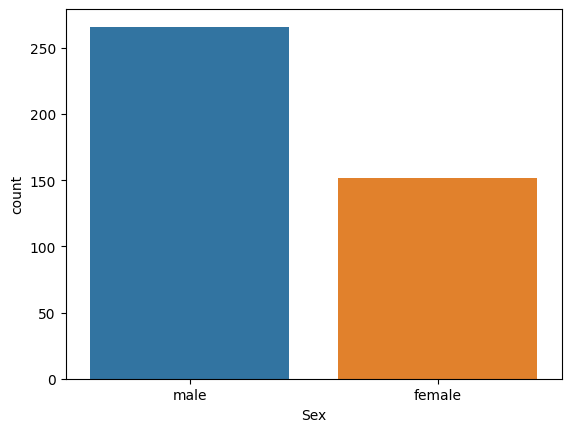

In [48]:
sns.countplot(x=df['Sex'])

<Axes: xlabel='Survived', ylabel='count'>

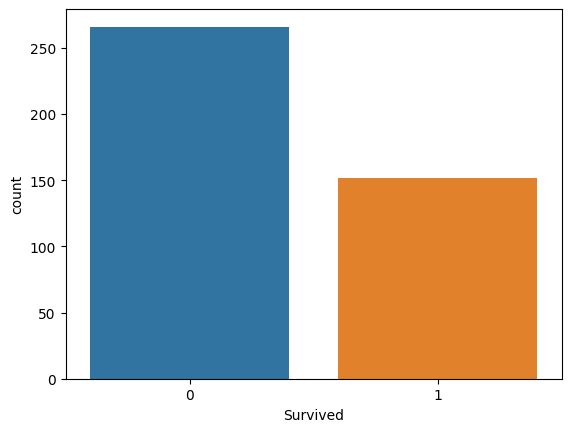

In [49]:
sns.countplot(x=df['Survived'])

In [51]:
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder from scikit-learn

le = LabelEncoder()
columns_to_encode = ['Sex', 'Embarked']

for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

# Now 'Sex' and 'Embarked' columns are encoded


In [52]:
le = LabelEncoder()
columnsle=['Sex', 'Embarked']
for i in columnsle:
    df[i] = le.fit_transform(df[i])

In [53]:
summary(df).style.background_gradient(cmap='twilight_shifted_r')


,dtypes,missing#,missing%,uniques,count,min,max,mean
Survived,int64,0,0.000000,2,418,0.000000,1.000000,0.363636
Pclass,int64,0,0.000000,3,418,1.000000,3.000000,2.265550
Sex,int64,0,0.000000,2,418,0.000000,1.000000,0.636364
Age,float64,0,0.000000,79,418,0.170000,76.000000,29.599282
SibSp,int64,0,0.000000,7,418,0.000000,8.000000,0.447368
Parch,int64,0,0.000000,8,418,0.000000,9.000000,0.392344
Fare,float64,0,0.000000,170,418,0.000000,512.329200,35.627188
Embarked,int64,0,0.000000,3,418,0.000000,2.000000,1.401914


In [54]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [56]:
pip install imbalanced-learn


     ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/235.6 kB ? eta -:--:--
     ---- -------------------------------- 30.7/235.6 kB 217.9 kB/s eta 0:00:01
     ---- -------------------------------- 30.7/235.6 kB 217.9 kB/s eta 0:00:01
     ---- -------------------------------- 30.7/235.6 kB 217.9 kB/s eta 0:00:01
     ------ ------------------------------ 41.0/235.6 kB 151.3 kB/s eta 0:00:02
     --------- --------------------------- 61.4/235.6 kB 172.4 kB/s eta 0:00:02
     ----------- ------------------------- 71.7/235.6 kB 187.3 kB/s eta 0:00:01
     ----------- ------------------------- 71.7/235.6 kB 187.3 kB/s eta 0:00:01
     ----------- ------------------------- 71.7/235.6 kB 187.3 kB/s eta 0:00:01
     -------------- ---------------------- 92.2/235.6 kB 180.8 kB/s eta 0:00:01
     ----------------- ------------------ 112.6/235.6 kB 198.4 kB/s eta 0:00:01
     ------------------ ----------------- 122.9/235.6


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
from imblearn.combine import SMOTETomek
smt=SMOTETomek()
x,y=smt.fit_resample(x,y)

<Axes: xlabel='Survived', ylabel='count'>

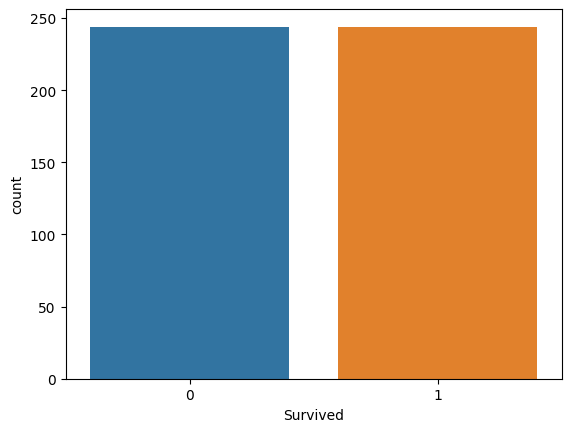

In [58]:
sns.countplot(x=y)

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Now you can use DecisionTreeClassifier, RandomForestClassifier, and GradientBoostingClassifier in your code
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()


In [63]:
from sklearn.ensemble import AdaBoostClassifier  # Import AdaBoostClassifier from scikit-learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Now you can use AdaBoostClassifier, KNeighborsClassifier, and LogisticRegression in your code
ada = AdaBoostClassifier()
knn = KNeighborsClassifier()
lr = LogisticRegression()


In [64]:
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
ada = AdaBoostClassifier()
knn = KNeighborsClassifier()
lr = LogisticRegression()

In [65]:
dtree.fit(x_train, y_train)
rf.fit(x_train, y_train)
gb.fit(x_train, y_train)
ada.fit(x_train, y_train)
knn.fit(x_train, y_train)
lr.fit(x_train, y_train)

c:\Users\Fjwu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
pdtreetr = dtree.predict(x_train)
pdtreete = dtree.predict(x_test)

prftr = rf.predict(x_train)
prfte = rf.predict(x_test)

pgbtr = gb.predict(x_train)
pgbte = gb.predict(x_test)

padatr = ada.predict(x_train)
padate = ada.predict(x_test)

pknntr = knn.predict(x_train)
pknnte = knn.predict(x_test)

In [67]:
def acc_report(actual,predicted):
    acc_score=accuracy_score(actual,predicted)
    cm_matrix=confusion_matrix(actual,predicted)
    class_rep=classification_report(actual,predicted)
    print('the accuracy of tha model is ',acc_score)
    print(cm_matrix)
    print(class_rep)

In [69]:
from sklearn.metrics import confusion_matrix  # Import confusion_matrix from sklearn.metrics

def acc_report(actual, predicted):
    acc_score = accuracy_score(actual, predicted)
    cm_matrix = confusion_matrix(actual, predicted)
    class_rep = classification_report(actual, predicted)
    print('the accuracy of the model is ', acc_score)
    print('Confusion Matrix:')
    print(cm_matrix)
    print('Classification Report:')
    print(class_rep)

# Rest of your code


In [70]:
print(acc_report(y_train, pdtreetr))
print(acc_report(y_test, pdtreete))

the accuracy of the model is  1.0
Confusion Matrix:
[[194   0]
 [  0 196]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       194
           1       1.00      1.00      1.00       196

    accuracy                           1.00       390
   macro avg       1.00      1.00      1.00       390
weighted avg       1.00      1.00      1.00       390

None
the accuracy of the model is  1.0
Confusion Matrix:
[[50  0]
 [ 0 48]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        48

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98

None


In [71]:
print(acc_report(y_train, prftr))
print(acc_report(y_test, prfte))

the accuracy of the model is  1.0
Confusion Matrix:
[[194   0]
 [  0 196]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       194
           1       1.00      1.00      1.00       196

    accuracy                           1.00       390
   macro avg       1.00      1.00      1.00       390
weighted avg       1.00      1.00      1.00       390

None
the accuracy of the model is  1.0
Confusion Matrix:
[[50  0]
 [ 0 48]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        48

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98

None


In [72]:
print(acc_report(y_train, pgbtr))
print(acc_report(y_test, pgbte))

the accuracy of the model is  1.0
Confusion Matrix:
[[194   0]
 [  0 196]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       194
           1       1.00      1.00      1.00       196

    accuracy                           1.00       390
   macro avg       1.00      1.00      1.00       390
weighted avg       1.00      1.00      1.00       390

None
the accuracy of the model is  1.0
Confusion Matrix:
[[50  0]
 [ 0 48]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        48

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98

None


In [73]:
print(acc_report(y_train, padatr))
print(acc_report(y_test, padate))

the accuracy of the model is  1.0
Confusion Matrix:
[[194   0]
 [  0 196]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       194
           1       1.00      1.00      1.00       196

    accuracy                           1.00       390
   macro avg       1.00      1.00      1.00       390
weighted avg       1.00      1.00      1.00       390

None
the accuracy of the model is  1.0
Confusion Matrix:
[[50  0]
 [ 0 48]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        48

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98

None


In [74]:
print(acc_report(y_train, pknntr))
print(acc_report(y_test, pknnte))

the accuracy of the model is  0.8564102564102564
Confusion Matrix:
[[158  36]
 [ 20 176]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       194
           1       0.83      0.90      0.86       196

    accuracy                           0.86       390
   macro avg       0.86      0.86      0.86       390
weighted avg       0.86      0.86      0.86       390

None
the accuracy of the model is  0.7142857142857143
Confusion Matrix:
[[32 18]
 [10 38]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.64      0.70        50
           1       0.68      0.79      0.73        48

    accuracy                           0.71        98
   macro avg       0.72      0.72      0.71        98
weighted avg       0.72      0.71      0.71        98

None
